# Capstone Project - Fang Hong


# Title of Project: Rossmann Store Sales
Kaggle link: https://www.kaggle.com/c/rossmann-store-sales

## Descriptive of the Project:
Rossmann operates over 3,000 drug stores in 7 European countries. Currently, Rossmann store managers are tasked with predicting their daily sales for up to six weeks in advance. Store sales are influenced by many factors, including promotions, competition, school and state holidays, seasonality, and locality. With thousands of individual managers predicting sales based on their unique circumstances, the accuracy of results can be quite varied.

In their first Kaggle competition, Rossmann is challenging you to predict 6 weeks of daily sales for 1,115 stores located across Germany. Reliable sales forecasts enable store managers to create effective staff schedules that increase productivity and motivation. By helping Rossmann create a robust prediction model, you will help store managers stay focused on what’s most important to them: their customers and their teams! 

## Aims of the Project:
- EDA: explore the relationship among different features
- Test models with different features
- Test model fits with different features and find out which models are good

## Steps to take:
- Step 1: Import the data and examine the descriptives of variables of interest; broadly examime the relationship between sales and features.
- Step 2: Run linear regression model to predict sales. -- Use Train_test split and K-folds cross-valication
 - Run null model
 - Run linear model with continous features (fixed features)
 - Run models with categorical features
- Step 3: Run linear regression model to predict sales. -- Use decision tree
- Step 4: Make the submission folder and submit to website to get accuracy score.

### Step 1: Import the data and examine the descriptives of variables of interest; broadly examime the relationship between sales and features.

In [145]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%config InlineBackend.figure_format = 'retina'
%matplotlib inline

from datetime import datetime as dt
from sklearn.model_selection import train_test_split


from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor


In [146]:
# import three dataframe: test, train, store
test=pd.read_csv('test.csv')
test.head(5)

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0


In [147]:
train=pd.read_csv('train.csv')
train.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1


In [148]:
train.dtypes

Store             int64
DayOfWeek         int64
Date             object
Sales             int64
Customers         int64
Open              int64
Promo             int64
StateHoliday     object
SchoolHoliday     int64
dtype: object

In [230]:
train.describe

<bound method DataFrame.describe of          Store  DayOfWeek        Date  Sales  Customers  Open  Promo  \
0            1          5  2015-07-31   5263        555     1      1   
1            2          5  2015-07-31   6064        625     1      1   
2            3          5  2015-07-31   8314        821     1      1   
3            4          5  2015-07-31  13995       1498     1      1   
4            5          5  2015-07-31   4822        559     1      1   
5            6          5  2015-07-31   5651        589     1      1   
6            7          5  2015-07-31  15344       1414     1      1   
7            8          5  2015-07-31   8492        833     1      1   
8            9          5  2015-07-31   8565        687     1      1   
9           10          5  2015-07-31   7185        681     1      1   
10          11          5  2015-07-31  10457       1236     1      1   
11          12          5  2015-07-31   8959        962     1      1   
12          13          5  2

In [149]:
store=pd.read_csv('store.csv')
store.head(5)

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN


In [150]:
store.dtypes

Store                          int64
StoreType                     object
Assortment                    object
CompetitionDistance          float64
CompetitionOpenSinceMonth    float64
CompetitionOpenSinceYear     float64
Promo2                         int64
Promo2SinceWeek              float64
Promo2SinceYear              float64
PromoInterval                 object
dtype: object

In [151]:
train.dropna()
store.dropna()
test.dropna()

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
5,6,10,4,2015-09-17,1.0,1,0,0
6,7,11,4,2015-09-17,1.0,1,0,0
7,8,12,4,2015-09-17,1.0,1,0,0
8,9,13,4,2015-09-17,1.0,1,0,0
9,10,14,4,2015-09-17,1.0,1,0,0


-- Since train and Store both have the key value store (store number); let's merge them today to have a dataframe that have all features

In [152]:
train_store=pd.merge(train, store, on='Store')
train_store.head(5)

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
1,1,4,2015-07-30,5020,546,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
2,1,3,2015-07-29,4782,523,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,1,2,2015-07-28,5011,560,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
4,1,1,2015-07-27,6102,612,1,1,0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN


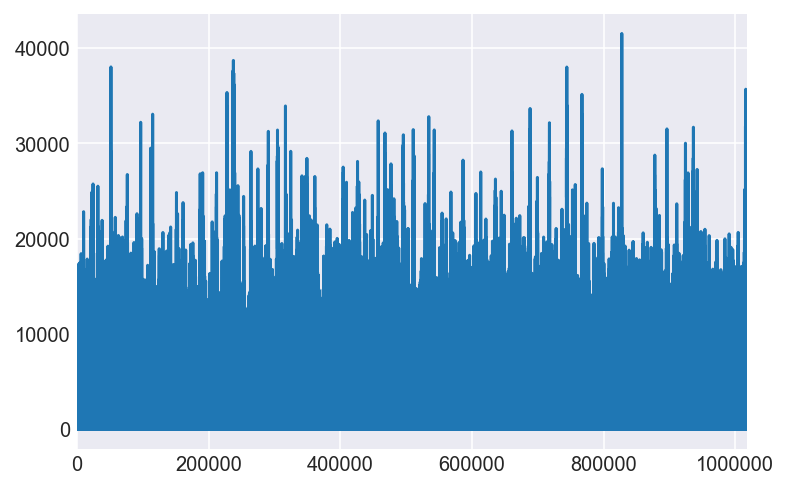

In [153]:
train_store.Sales.plot()

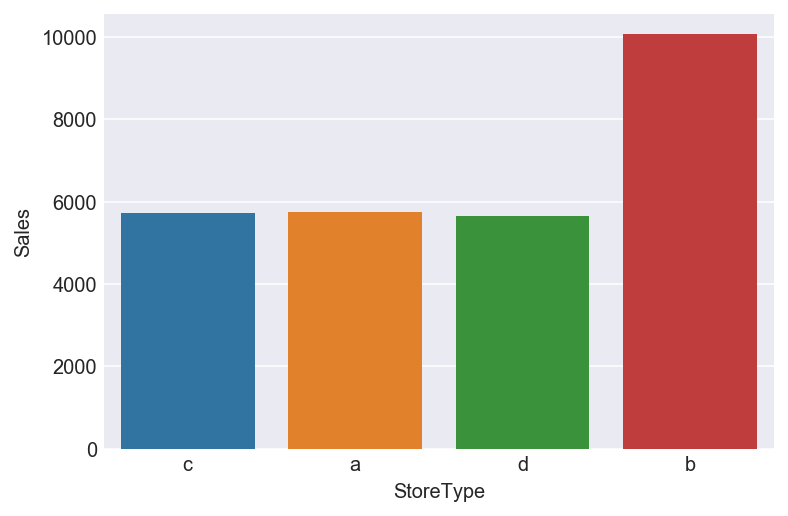

In [154]:
# Descripative of each store types
#train_store.groupby('StoreType').Sales.mean()
sns.barplot(data=train_store, x='StoreType', y='Sales', ci=None)

-- Store type b has the highest mean sales. Thus, StoreType mighe be a good figure to predict sales.

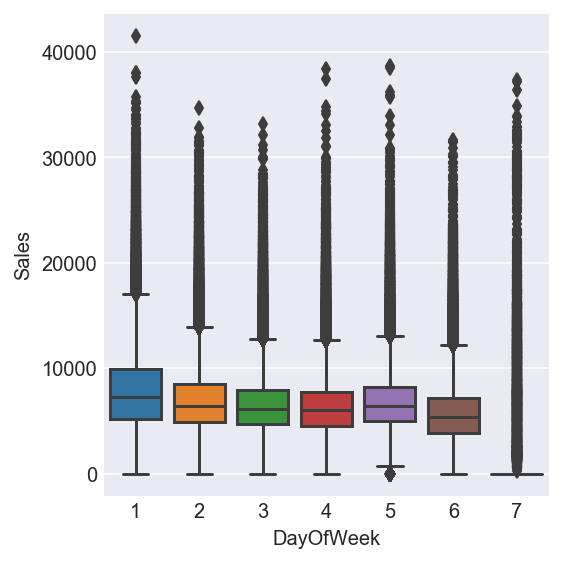

In [179]:
# Box plot for day of week
#train.boxplot(column='Sales', by='DayOfWeek') # day 7 is very different from other days
sns.factorplot(
    x='DayOfWeek',
    y='Sales',
    data=train,
    kind='box',
)

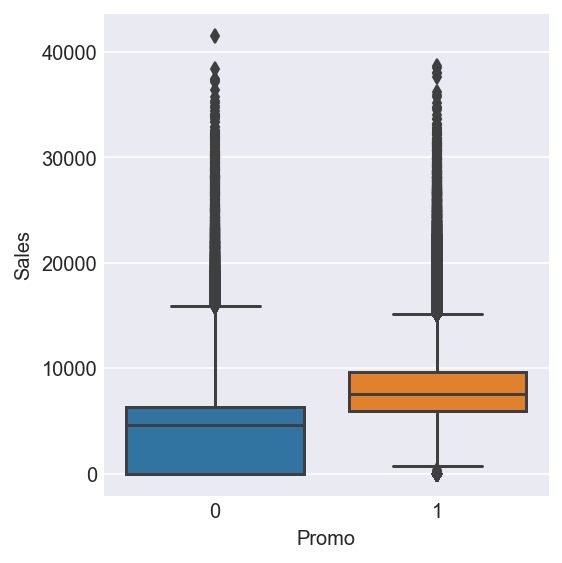

In [180]:
# Box plot for promotion or not promotion
sns.factorplot(
    x='Promo',
    y='Sales',
    data=train,
    kind='box',
)

-- whether the store has promotion or not affect the sales. Promo might be a good feature.

In [156]:
# Examine the whether the sales affected by assorment for each types of store.
train_store.groupby(['StoreType', 'Assortment']).Sales.mean()

StoreType  Assortment
a          a              5398.858310
           c              6310.867032
b          a             10821.619806
           b              8553.931999
           c             17969.556263
c          a              5647.174314
           c              5805.782193
d          a              5317.885943
           c              5826.407660
Name: Sales, dtype: float64

-- Sales differ with different types of assortment. Assortment might also be a good feature.

In [157]:
# Examine the whether Day of Week impact sales for each types of score.
examine2=train_store.groupby(['StoreType', 'DayOfWeek']).Sales.mean()
#examine2.plot(kind='bar', figsize=(10, 8), ))

It seems people shoped less (sales is lower) on day 6 and day 7 thank other days of week. Day of Week should be a good feature.

In [158]:
# Examine whether the SchoolHoliday (school closed during this holiday) affects sales
train_store.groupby(['StoreType', 'SchoolHoliday']).Sales.mean()

StoreType  SchoolHoliday
a          0                 5566.874552
           1                 6527.078496
b          0                10071.792396
           1                10001.463649
c          0                 5571.810326
           1                 6414.502941
d          0                 5514.277300
           1                 6230.282334
Name: Sales, dtype: float64

-- school holiday increase sales of store type a, c, d, but decrease sales of store type b.

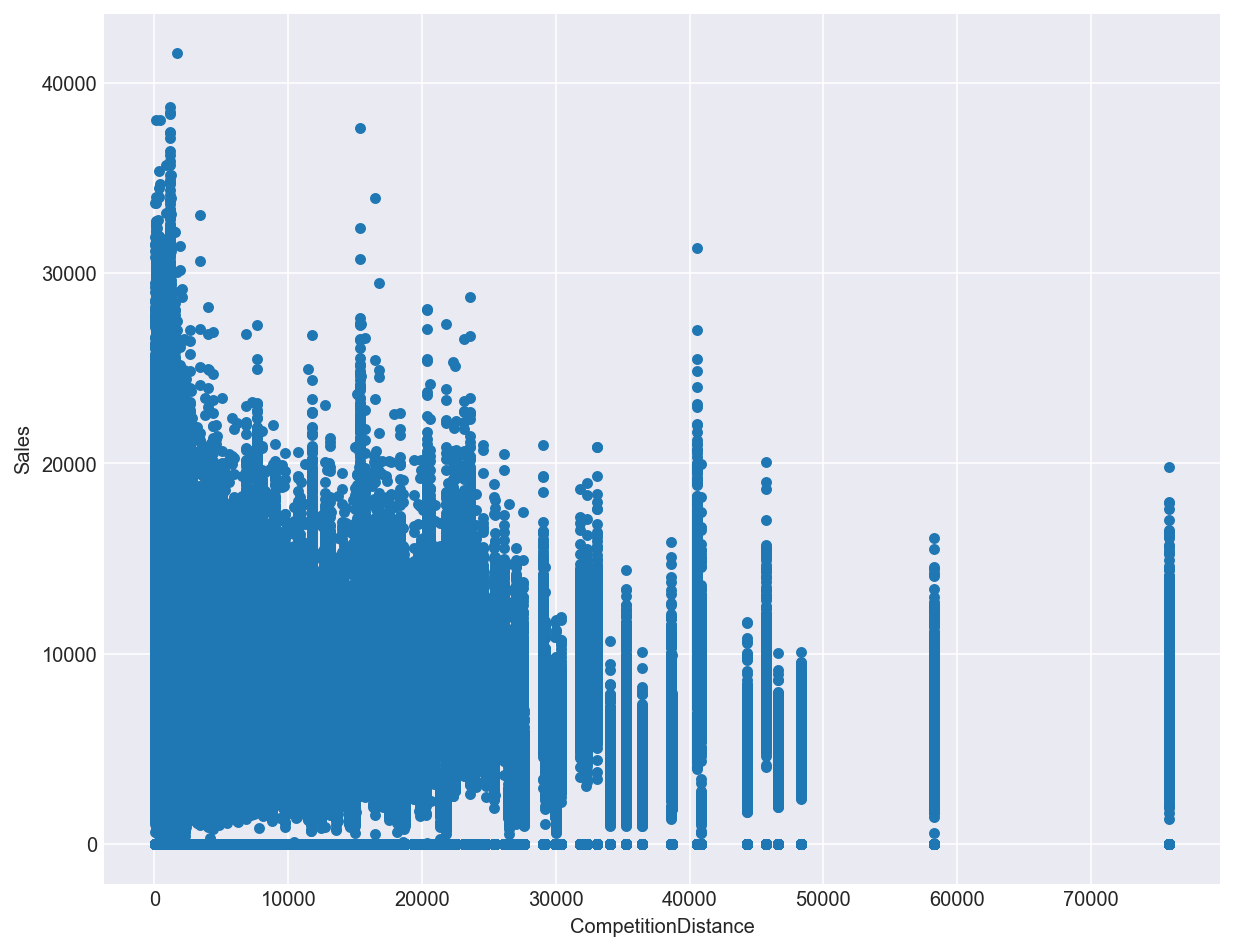

In [159]:
# Examine the association between sales and CompetitionDistance
train_store.plot.scatter(x='CompetitionDistance', y='Sales', legend=True, figsize=(10, 8))

--It seems the relationship is not very clear. Generally, the smaller the distance, the higher the sale. Probably because the more the stores, the more likely the locations is good and have more people/visitors.

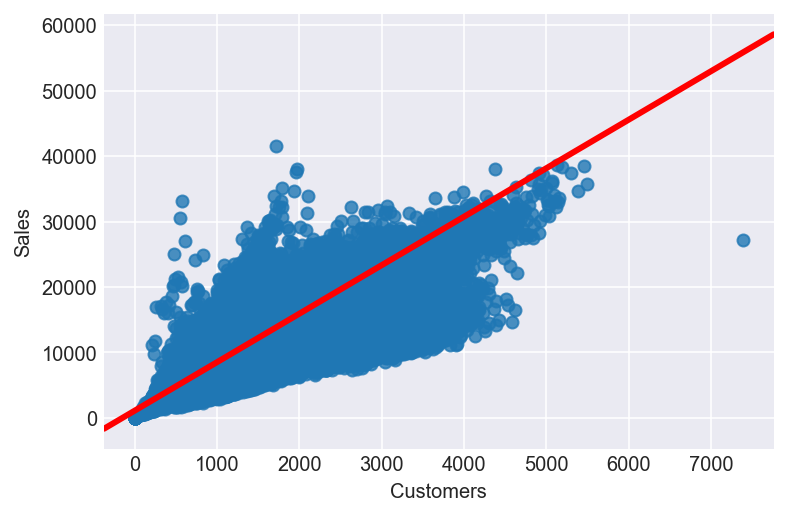

In [160]:
# Examine the association between number of customers and sales
#train_store.plot.scatter(x='Customers', y='Sales', legend=True, figsize=(10, 8))

sns.regplot('Customers','Sales', data = train_store, line_kws={"color":"r", "lw":3})


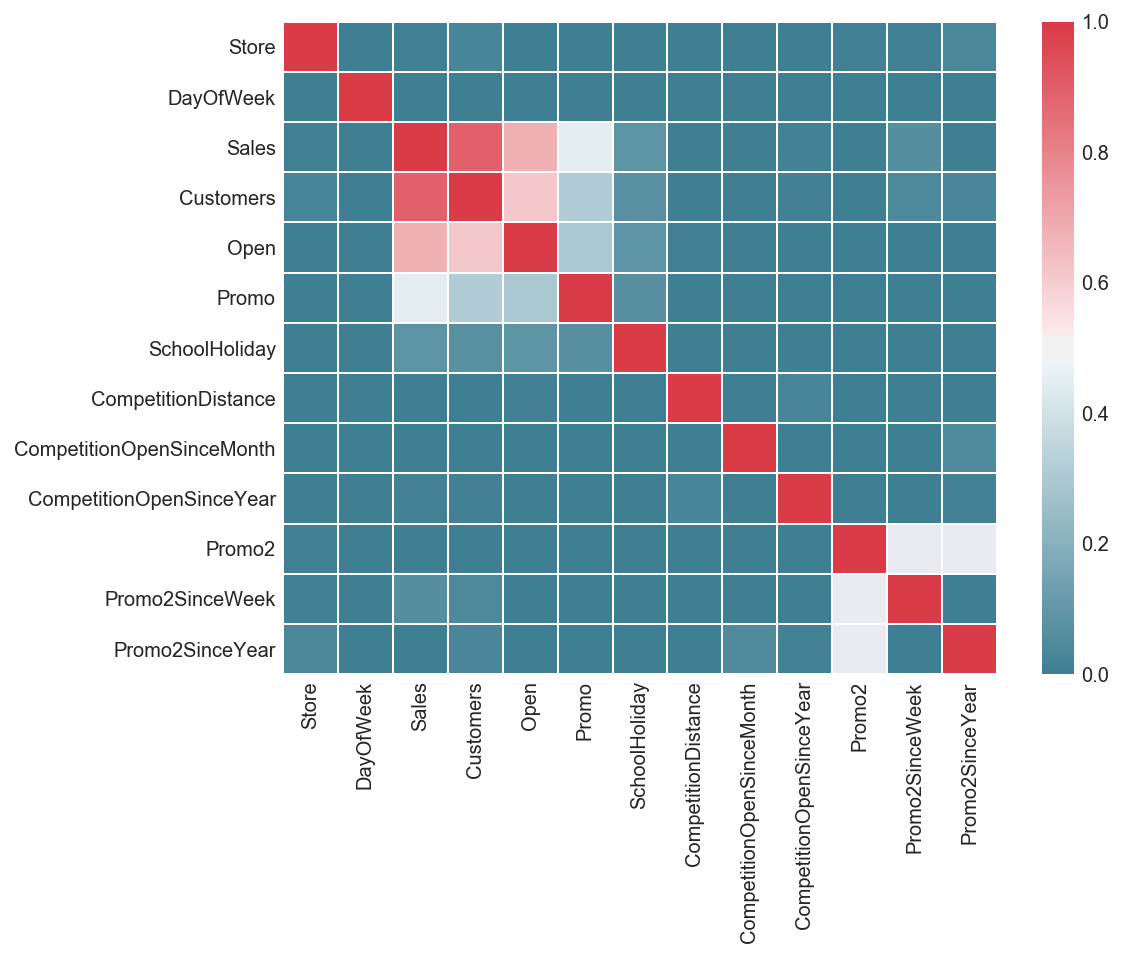

In [161]:
# Examine the correlation among different features.
plt.subplots(figsize=(8,6))
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(train_store.corr(), vmin=0, vmax=1, cmap=cmap, linewidths=.5)

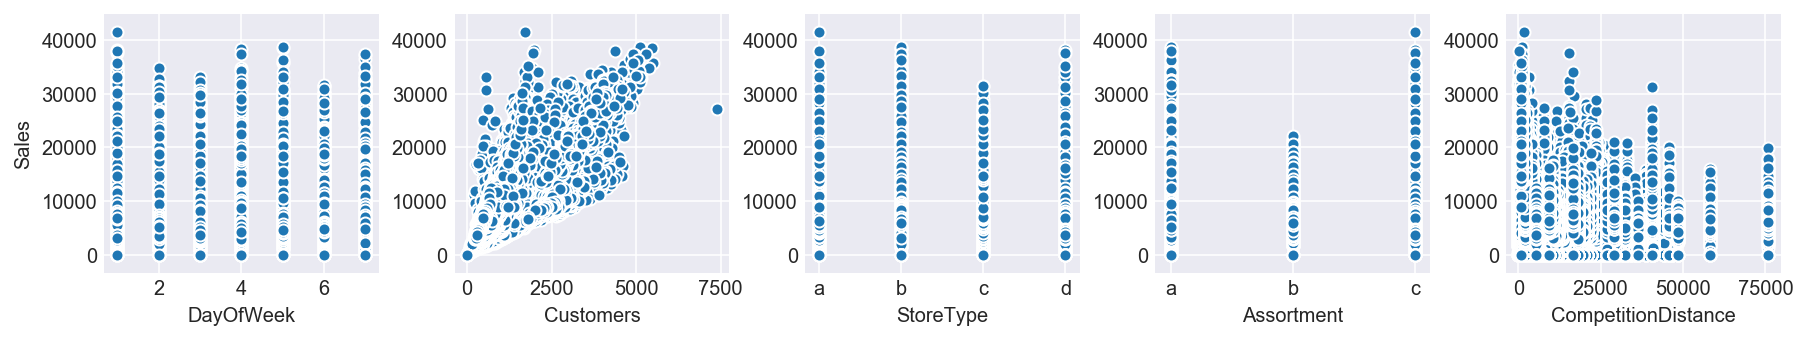

In [162]:
#Multiple scatterplots in Seaborn
sns.set_style('darkgrid')
feature_cols1=['DayOfWeek', 'Customers', 'StoreType', 'Assortment', 'CompetitionDistance']
sns.pairplot(train_store, x_vars=feature_cols1, y_vars='Sales', kind='scatter', palette="Set2")

-- A very clear relationship: the larger the number of customers, the higher the sales.

In general, possible good features include StoreType (categorical), Assortment(categorical), DayofWeek(categorical), SchoolHoliday(categorical), customers. However, the test dataset does not the variable customers, so we will not going to use it as a feature.

### Step 2: Run linear regression model to predict sales. -- Use Train_test split and K-Folds cross-valication

### Model 1: Run null model

In [164]:
from sklearn import metrics
# Split X and y into training and testing sets.
X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=123)

#Create a numpy array with the same shape as y_test
y_null=np.zeros_like(y_test, dtype=float)

#Fill the array with the mean value of y_test.
y_null.fill(y_test.mean())

#compute null RMSE
np.sqrt(metrics.mean_squared_error(y_test, y_null))

3846.7417571130177

### Model 2: Model using Decision Tree to run model: Use featuer 'DayofWeek'

In [169]:
# examine the type of the dataframe
type(train_store)

pandas.core.frame.DataFrame

In [165]:
train_store['DayOfWeek'].value_counts()

5    145845
4    145845
3    145665
2    145664
7    144730
6    144730
1    144730
Name: DayOfWeek, dtype: int64

In [174]:
# Encode DayofWeek: 1-6=0, 7=1
train_store['DayOfWeek_recode']=train_store.DayOfWeek.map(lambda x:1 if x==7 else 0)
train_store['DayOfWeek_recode'].value_counts()
#{'1':0, '2':0, '3':0, '4':0, '5':0, '6':0, '7':1}

0    872479
1    144730
Name: DayOfWeek_recode, dtype: int64

In [175]:
# Define X and y
feature_cols=['DayOfWeek_recode']
X=train_store[feature_cols]
y=train_store.Sales



#Instantiate a DecisionTreeRegressor (with randome_state)
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score
treereg=DecisionTreeRegressor(random_state=1)
scores=cross_val_score(treereg, X, y, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

3111.1421408678229

### Model 3: Model using Decision Tree:  Use featuer 'DayOfWeek_recode'  & 'Promo'

In [208]:
train_store['Promo'].value_counts()

0    629129
1    388080
Name: Promo, dtype: int64

In [210]:
# select x and y
feature_cols=['Promo', 'DayOfWeek_recode']
X=train_store[feature_cols]
y=train_store.Sales

#Instantiate a DecisionTreeRegressor (with randome_state)
treereg=DecisionTreeRegressor(random_state=1)
scores=cross_val_score(treereg, X, y, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

2920.2724622414007

-- RMSE become smaller than null model and model 2.

### Model 4: Model using decision tree: use features 'StoreType'

In [211]:
train_store['StoreType'].value_counts()

a    551627
d    312912
c    136840
b     15830
Name: StoreType, dtype: int64

In [214]:
# Encode StoreType: 1 for type a, b, c,; 0 for type d
train_store['StoreType_recode']=train_store.StoreType.map(lambda x:1 if x=='b' else 0)
train_store['StoreType_recode'].value_counts()

0    1001379
1      15830
Name: StoreType_recode, dtype: int64

In [217]:
# select x and y
feature_cols=['StoreType_recode']
X=train_store[feature_cols]
y=train_store.Sales

#Instantiate a DecisionTreeRegressor (with randome_state)
treereg=DecisionTreeRegressor(random_state=1)
scores=cross_val_score(treereg, X, y, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

3814.4461273839556

### Model 5: Model using decision tree: use features 'StoreType', 'DayOfWeek_recode'  & 'Promo'

In [219]:
# select x and y
feature_cols=['StoreType_recode','Promo', 'DayOfWeek_recode' ]
X=train_store[feature_cols]
y=train_store.Sales

#Instantiate a DecisionTreeRegressor (with randome_state)
treereg=DecisionTreeRegressor(random_state=1)
scores=cross_val_score(treereg, X, y, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

2852.2803460161413

### Model 6: Use continous feature 'CompetitionDistance' to Predict Sales: train_test split

### Run linear models

In [197]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
train_store.dropna()
# Run models with different features
#feature_cols=['CompetitionDistance']
#X=train_store[feature_cols]
#y=train_store.Sales

#X_train, X_test, y_train, y_test=train_test_split(X, y)
#lr.fit(X_train, y_train)
#list(zip(feature_cols, lr.coef_))

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,DayOfWeek_recode
942,2,5,2015-07-31,6064,625,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
943,2,4,2015-07-30,5567,601,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
944,2,3,2015-07-29,6402,727,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
945,2,2,2015-07-28,5671,646,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
946,2,1,2015-07-27,6627,638,1,1,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
947,2,7,2015-07-26,0,0,0,0,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",1
948,2,6,2015-07-25,2512,316,1,0,0,0,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
949,2,5,2015-07-24,3854,468,1,0,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
950,2,4,2015-07-23,4108,521,1,0,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0
951,2,3,2015-07-22,5093,650,1,0,0,1,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",0


In [220]:
train_store['CompetitionDistance'].isnull().sum()

2642

- CompetitionDistance contains null values, so the null values need to be droped.

In [200]:
# Define a function that accepts a list of features and returns testing RMSE
#def train_test_rmse(df, feature_cols):
    X=df[feature_cols]
    y=df.Sales
    X_train, X_test, y_train, y_test=train_test_split(X, y, random_state=123)
    lr.fit(X_train, y_train)
    y_pred = linreg.predict(X_test)
    return np.sqrt(metrics.mean_squared_error(y_test, y_pred))

# Run models with different features
print(train_test_rmse(train_store, ['CompetitionDistance']))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Model 4: Use categorical feature to predict Sales

### Convert all categorical features.

In [ ]:
# convert categorical variables (StoreType) to multiple dummy codetrain
train_store_type1=pd.get_dummies(train_store.StoreType, prefix='StoreType')

# drop the first column
train_store_type1.drop(train_store_type1.columns[0], axis=1, inplace=True)

# concatenate the orginal train_store dataframe and the dummy dataframe
train_store1=pd.concat([train_store, train_store_type1], axis=1)

In [ ]:
# convert categorical variables (Assortment) to multiple dummy codetrain
train_store_assortment=pd.get_dummies(train_store.Assortment, prefix='Assortment')

# drop the first column
train_store_assortment.drop(train_store_assortment.columns[0], axis=1, inplace=True)

# concatenate the orginal train_store dataframe and the dummy dataframe
train_store2=pd.concat([train_store1, train_store_assortment], axis=1)

In [ ]:
# convert categorical variables (DayOfWeek) to multiple dummy codetrain
train_store_dayofweek=pd.get_dummies(train_store.DayOfWeek, prefix='DayOfWeek')

# drop the first column
train_store_dayofweek.drop(train_store_dayofweek.columns[0], axis=1, inplace=True)

# concatenate the orginal train_store dataframe and the dummy dataframe
train_store3=pd.concat([train_store2, train_store_dayofweek], axis=1)

In [ ]:
# convert categorical variables (SchoolHoliday) to multiple dummy codetrain
train_store_SchoolHoliday=pd.get_dummies(train_store.SchoolHoliday, prefix='SchoolHoliday')

# drop the first column
train_store_SchoolHoliday.drop(train_store_SchoolHoliday.columns[0], axis=1, inplace=True)

# concatenate the orginal train_store dataframe and the dummy dataframe
train_store4=pd.concat([train_store3, train_store_dayofweek], axis=1)
train_store4.head(5)

In [ ]:
train_store4.columns

### Run mutiple linear regression

In [ ]:
# Run the linear regression with dummy variables included
#from sklearn.model_selection import train_test_split
#from sklearn.linear_model import LinearRegression
#lr=LinearRegression()

#feature_cols=['StoreType_b', u'StoreType_c', 'StoreType_d', 'Assortment_b', 'Assortment_c', 'DayOfWeek_2', 'DayOfWeek_3', u'DayOfWeek_4', u'DayOfWeek_5', u'DayOfWeek_6', 'DayOfWeek_7', u'DayOfWeek_2', u'DayOfWeek_3', u'DayOfWeek_4', 'DayOfWeek_5', u'DayOfWeek_6', u'DayOfWeek_7']
#x=train_store4[feature_cols]
#y=train_store4.Sales

#lr.fit(x, y)
#list(zip(feature_cols, lr.coef_))